## What factors of a breast tumour affect can predict its malignancy?
We take the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download) from Kaggle to see which features of a breast tumour are more likely able to predict malignancy.

### Data Science Pipeline
1. Data Collection
2. Data Preprocessing
3. Feature Engineering
4. Model Building
5. Model Evaluation
6. Model Deployment

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

### Data Preprocessing

In [231]:
df = pd.read_csv("cancer_data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [199]:
df.info()

#here, we can see that there are 4 types of data: 
#diagnosis, mean, standard error and worst

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [245]:
#we will change diagnosis data to binary form, 1 for malignant and 0 for benign
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [247]:
df['Unnamed: 32'].unique()

array([nan])

In [249]:
#drop this col as it only contains NaN values
df = df.drop('Unnamed: 32', axis=1)

In [251]:
#check for any null values in other columns
df.isnull().values.any()

False

In [253]:
#we split the data sets into 3 different dfs
df_mean = df.filter(like='mean', axis=1).copy()
df_se = df.filter(like='se', axis=1).copy()
df_worst = df.filter(like='worst', axis=1).copy()

dfs = [df_mean, df_se, df_worst]
for data in dfs:
    data['diagnosis'] = df['diagnosis']

In [273]:
print(df_mean.info())
print(df_se.info())
print(df_worst.info())
common_cols = df.columns.intersection(df_se.columns)
df_mean_worst = df.drop(columns=common_cols)
df_mean_worst['diagnosis'] = df['diagnosis']

df_mean_worst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   area_mean               569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   concavity_mean          569 non-null    float64
 7   concave points_mean     569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
 10  diagnosis               569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  D

In [275]:
#we check the correlation between the mean, worst features and diagnosis
mean_corr = df_mean.corr(numeric_only=True)['diagnosis'].drop('diagnosis').sort_values(ascending=False)
worst_corr = df_worst.corr(numeric_only=True)['diagnosis'].drop('diagnosis').sort_values(ascending=False)
df_corr = df_mean_worst.corr(numeric_only=True)['diagnosis'].drop('diagnosis').sort_values(ascending=False)

print(mean_corr)
print(worst_corr)
print(df_corr)

concave points_mean       0.776614
perimeter_mean            0.742636
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
compactness_mean          0.596534
texture_mean              0.415185
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
Name: diagnosis, dtype: float64
concave points_worst       0.793566
perimeter_worst            0.782914
radius_worst               0.776454
area_worst                 0.733825
concavity_worst            0.659610
compactness_worst          0.590998
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
fractal_dimension_worst    0.323872
Name: diagnosis, dtype: float64
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mea

In [277]:
high_mean_corr = mean_corr[mean_corr>0.5]
high_worst_corr = worst_corr[worst_corr>0.5]
high_df_corr = df_corr[df_corr>0.5]

print(high_mean_corr)
print('\n')
print(high_worst_corr)
print('\n')
print(high_df_corr)

concave points_mean    0.776614
perimeter_mean         0.742636
radius_mean            0.730029
area_mean              0.708984
concavity_mean         0.696360
compactness_mean       0.596534
Name: diagnosis, dtype: float64


concave points_worst    0.793566
perimeter_worst         0.782914
radius_worst            0.776454
area_worst              0.733825
concavity_worst         0.659610
compactness_worst       0.590998
Name: diagnosis, dtype: float64


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
Name: diagnosis, dtype: float64


In [299]:
high_mean_corr = high_mean_corr.head(5)
high_worst_corr = high_worst_corr.head(5)
high_df_corr = high_df_corr.head(5)

high_df_corr = pd.DataFrame(high_df_corr)
high_df_corr

#we now see that concave points_worst, perimeter_worst, concave points_mean, radius_worst and perimeter_mean are the top 5 contributing factors

,diagnosis
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636


### Machine Learning: Logistic Regression

In [301]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [313]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [315]:
#predict
y_pred = model.predict(X_test)

In [335]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred, output_dict=True)

class_report = pd.DataFrame(class_report).transpose()
class_report

Accuracy: 0.9736842105263158


,precision,recall,f1-score,support
0,0.972222,0.985915,0.979021,71.000000
1,0.976190,0.953488,0.964706,43.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974206,0.969702,0.971863,114.000000
weighted avg,0.973719,0.973684,0.973621,114.000000


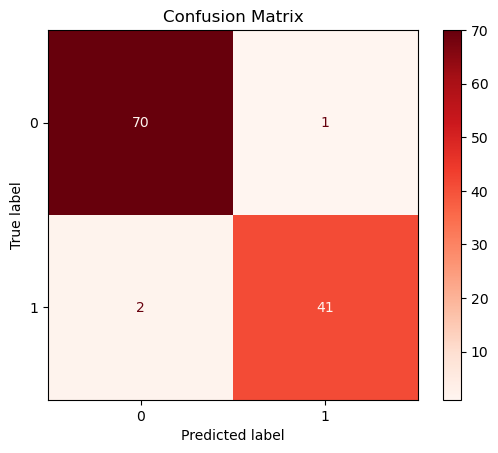

In [319]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Reds')  
plt.title('Confusion Matrix')
plt.show()

### Model Deployment

In [347]:
!pip install fastapi uvicorn joblib
import joblib

joblib.dump(model, "my_model.pkl")  

['my_model.pkl']

In [349]:
# app.py
from fastapi import FastAPI
import joblib
import pandas as pd

model = joblib.load("my_model.pkl")
app = FastAPI()

@app.post("/predict")
def predict(data: dict):
    df = pd.DataFrame([data])
    prediction = model.predict(df)[0]
    return {"prediction": int(prediction)}


SyntaxError: invalid syntax (1867459706.py, line 1)